# Linear Regression Analysis: Best-Selling Video Games

## Executive Summary

This project demonstrates the practical application of linear regression machine learning techniques to analyze and predict video game sales using real-world data from the best-selling video games of all time. The project serves as a comprehensive educational tutorial that bridges theoretical concepts with hands-on implementation using Python and popular data science libraries.

Linear regression is one of the most fundamental and widely used statistical techniques in machine learning and data science. Despite its simplicity, it forms the foundation for understanding more complex algorithms and provides powerful insights into relationships between variables. In the gaming industry, understanding sales patterns is crucial for publishers, developers, and investors making strategic decisions.

Linear regression serves as the gateway to understanding:
- Supervised learning concepts
- Model training and evaluation
- Statistical relationships between variables
- The bias-variance tradeoff
- Overfitting and underfitting

### Objectives

The primary objectives of this project are:

1. **Educational Demonstration**: Provide a clear, comprehensive tutorial on implementing linear regression from data collection to model evaluation
2. **Practical Application**: Apply machine learning techniques to real-world video game sales data
3. **Predictive Modeling**: Develop a model capable of predicting game sales based on temporal features
4. **Statistical Analysis**: Evaluate model performance using industry-standard metrics
5. **Data Visualization**: Create meaningful visual representations of data patterns and model results

### Dataset Description

The dataset comprises best-selling video games of all time with the following attributes:

- **Rank**: Position in the best-sellers list
- **Title**: Name of the video game
- **Sales**: Total units sold (in millions)
- **Series**: Game franchise or series
- **Platform(s)**: Gaming platforms on which the game is available
- **Initial Release Date**: When the game was first launched
- **Developer(s)**: Studios that created the game
- **Publisher(s)**: Companies that published the game

This rich dataset provides multiple opportunities for analysis and feature engineering, making it ideal for demonstrating various data science techniques.

### Problem Statement

**Can we predict the total sales of a video game based on how long it has been available in the market?**

This question addresses a fundamental business insight: understanding how sales accumulate over time. Older games have had more time to reach customers across multiple platforms, price points, and marketing campaigns. By quantifying this relationship, we can:

- Estimate future sales trajectories for newer games
- Understand the long-term value of game titles
- Make data-driven decisions about re-releases and remasters
- Identify outliers that perform exceptionally well or poorly relative to their market presence

### Methodology Overview

Our approach follows the standard machine learning pipeline:

1. **Data Loading & Exploration**: Import the dataset and understand its structure
2. **Data Preprocessing**: Clean data, handle missing values, and parse dates
3. **Feature Engineering**: Create meaningful features like "Years Since Release"
4. **Exploratory Data Analysis**: Visualize relationships and distributions
5. **Data Splitting**: Divide data into training and testing sets
6. **Model Training**: Fit a linear regression model to the training data
7. **Prediction**: Generate predictions on test data
8. **Evaluation**: Assess model performance using multiple metrics
9. **Visualization**: Create plots to interpret results
10. **Interpretation**: Draw conclusions and insights from the analysis

### Tools & Technologies

This project utilizes the following Python libraries:

- **Pandas**: Data manipulation and analysis
- **NumPy**: Numerical computing and array operations
- **Matplotlib & Seaborn**: Data visualization
- **Scikit-learn**: Machine learning algorithms and evaluation metrics
- **Datetime**: Date and time manipulation





In [4]:
#  Comment out if not required 
#%pip install pandas numpy seaborn matplotlib scikit-learn

### IMPORTS

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


### STEP 1: LOAD AND EXPLORE THE DATA

In [6]:
print("\n[STEP 1] Loading Data...")
df = pd.read_csv("Data/best-selling video games of all time.csv")

print(f"\nDataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nFirst few rows:")
print(df.head())

print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print("\nBasic Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


[STEP 1] Loading Data...

Dataset Shape: 50 rows, 8 columns

First few rows:
   Rank                Title      Sales            Series     Platform(s)  \
0     1            Minecraft  238000000         Minecraft  Multi-platform   
1     2   Grand Theft Auto V  175000000  Grand Theft Auto  Multi-platform   
2     3          Tetris (EA)  100000000            Tetris  Multi-platform   
3     4           Wii Sports   82900000               Wii             Wii   
4     5  PUBG: Battlegrounds   75000000     PUBG Universe  Multi-platform   

  Initial release date      Developer(s)       Publisher(s)  
0    November 18, 2011    Mojang Studios  Xbox Game Studios  
1   September 17, 2013    Rockstar North     Rockstar Games  
2   September 12, 2006         EA Mobile    Electronic Arts  
3    November 19, 2006      Nintendo EAD           Nintendo  
4    December 20, 2017  PUBG Corporation   PUBG Corporation  

Column Names:
['Rank', 'Title', 'Sales', 'Series', 'Platform(s)', 'Initial release dat

### STEP 2: DATA PREPROCESSING


In [7]:
print("\n" + "=" * 70)
print("[STEP 2] Data Preprocessing...")
print("=" * 70)

# Convert 'Initial release date' to datetime and extract year
df['Release_Date'] = pd.to_datetime(df['Initial release date'], errors='coerce')
df['Release_Year'] = df['Release_Date'].dt.year

# Calculate years since release (feature engineering)
current_year = datetime.now().year
df['Years_Since_Release'] = current_year - df['Release_Year']

# Handle missing values
df = df.dropna(subset=['Sales', 'Release_Year'])

print(f"\nAfter cleaning: {df.shape[0]} rows remaining")
print(f"Release Year Range: {df['Release_Year'].min()} to {df['Release_Year'].max()}")


[STEP 2] Data Preprocessing...

After cleaning: 50 rows remaining
Release Year Range: 1980 to 2020


### STEP 3: FEATURE SELECTION FOR LINEAR REGRESSION

In [8]:
print("\n" + "=" * 70)
print("[STEP 3] Feature Selection...")
print("=" * 70)

# For this tutorial, we'll predict Sales based on Years_Since_Release
# This demonstrates the relationship between time in market and total sales

X = df[['Years_Since_Release']].values  # Features (independent variable)
y = df['Sales'].values  # Target (dependent variable)

print(f"\nFeature (X): Years Since Release")
print(f"Target (y): Sales (in millions)")
print(f"\nDataset size: {len(X)} games")



[STEP 3] Feature Selection...

Feature (X): Years Since Release
Target (y): Sales (in millions)

Dataset size: 50 games


### STEP 4: VISUALIZE THE DATA



[STEP 4] Data Visualization...

Visualization saved as 'sales_visualization.png'


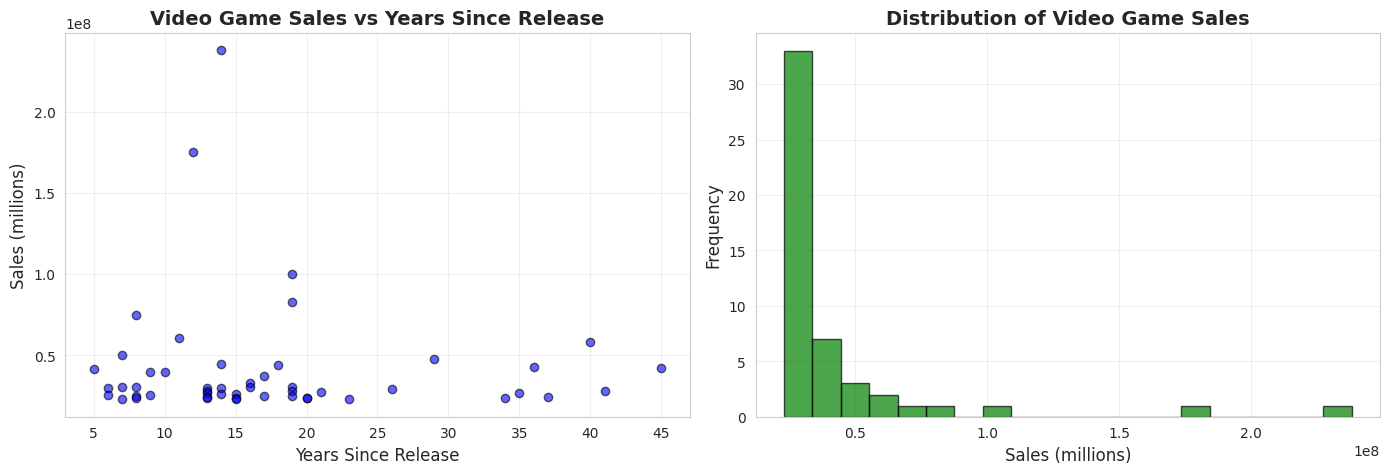

In [9]:
print("\n" + "=" * 70)
print("[STEP 4] Data Visualization...")
print("=" * 70)

plt.figure(figsize=(14, 5))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.6, color='blue', edgecolors='k')
plt.xlabel('Years Since Release', fontsize=12)
plt.ylabel('Sales (millions)', fontsize=12)
plt.title('Video Game Sales vs Years Since Release', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Distribution of sales
plt.subplot(1, 2, 2)
plt.hist(y, bins=20, color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Sales (millions)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Video Game Sales', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('sales_visualization.png', dpi=300, bbox_inches='tight')
print("\nVisualization saved as 'sales_visualization.png'")
plt.show()

### STEP 5: SPLIT DATA INTO TRAINING AND TESTING SETS


In [10]:
print("\n" + "=" * 70)
print("[STEP 5] Splitting Data...")
print("=" * 70)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {len(X_train)} samples")
print(f"Testing set: {len(X_test)} samples")
print(f"Split ratio: 80% train, 20% test")


[STEP 5] Splitting Data...
Training set: 40 samples
Testing set: 10 samples
Split ratio: 80% train, 20% test


### STEP 6: CREATE AND TRAIN THE LINEAR REGRESSION MODEL

In [11]:
print("\n" + "=" * 70)
print("[STEP 6] Training Linear Regression Model...")
print("=" * 70)

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Extract model parameters
slope = model.coef_[0]
intercept = model.intercept_

print(f"\nModel Equation: Sales = {intercept:.2f} + {slope:.2f} × Years_Since_Release")
print(f"\nInterpretation:")
print(f"  - Intercept: {intercept:.2f} million (predicted sales at release)")
print(f"  - Slope: {slope:.2f} million per year (sales change per year)")


[STEP 6] Training Linear Regression Model...

Model Equation: Sales = 47505142.32 + -131389.70 × Years_Since_Release

Interpretation:
  - Intercept: 47505142.32 million (predicted sales at release)
  - Slope: -131389.70 million per year (sales change per year)


### STEP 7: MAKE PREDICTIONS

In [12]:
print("\n" + "=" * 70)
print("[STEP 7] Making Predictions...")
print("=" * 70)

# Predictions on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\nSample Predictions (Test Set):")
print("-" * 50)
for i in range(min(5, len(X_test))):
    print(f"Years: {X_test[i][0]:.0f} | Actual: {y_test[i]:.1f}M | Predicted: {y_test_pred[i]:.1f}M")



[STEP 7] Making Predictions...

Sample Predictions (Test Set):
--------------------------------------------------
Years: 5 | Actual: 41590000.0M | Predicted: 46848193.8M
Years: 37 | Actual: 24430000.0M | Predicted: 42643723.5M
Years: 35 | Actual: 26662500.0M | Predicted: 42906502.9M
Years: 13 | Actual: 23640000.0M | Predicted: 45797076.2M
Years: 16 | Actual: 33140000.0M | Predicted: 45402907.1M


### STEP 8: EVALUATE MODEL PERFORMANCE


In [13]:
print("\n" + "=" * 70)
print("[STEP 8] Model Evaluation...")
print("=" * 70)

# Calculate metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTRAINING SET METRICS:")
print(f"  R² Score: {train_r2:.4f} ({train_r2*100:.2f}% variance explained)")
print(f"  RMSE: {train_rmse:.2f} million")
print(f"  MAE: {train_mae:.2f} million")

print("\nTEST SET METRICS:")
print(f"  R² Score: {test_r2:.4f} ({test_r2*100:.2f}% variance explained)")
print(f"  RMSE: {test_rmse:.2f} million")
print(f"  MAE: {test_mae:.2f} million")

print("\nMETRIC EXPLANATIONS:")
print("  - R² Score: Proportion of variance explained (closer to 1 is better)")
print("  - RMSE: Root Mean Squared Error (average prediction error)")
print("  - MAE: Mean Absolute Error (average absolute difference)")



[STEP 8] Model Evaluation...

TRAINING SET METRICS:
  R² Score: 0.0008 (0.08% variance explained)
  RMSE: 41364994.02 million
  MAE: 24046429.85 million

TEST SET METRICS:
  R² Score: -9.2638 (-926.38% variance explained)
  RMSE: 16872817.64 million
  MAE: 16122681.45 million

METRIC EXPLANATIONS:
  - R² Score: Proportion of variance explained (closer to 1 is better)
  - RMSE: Root Mean Squared Error (average prediction error)
  - MAE: Mean Absolute Error (average absolute difference)


### STEP 9: VISUALIZE RESULTS



[STEP 9] Visualizing Results...

Regression results saved as 'regression_results.png'


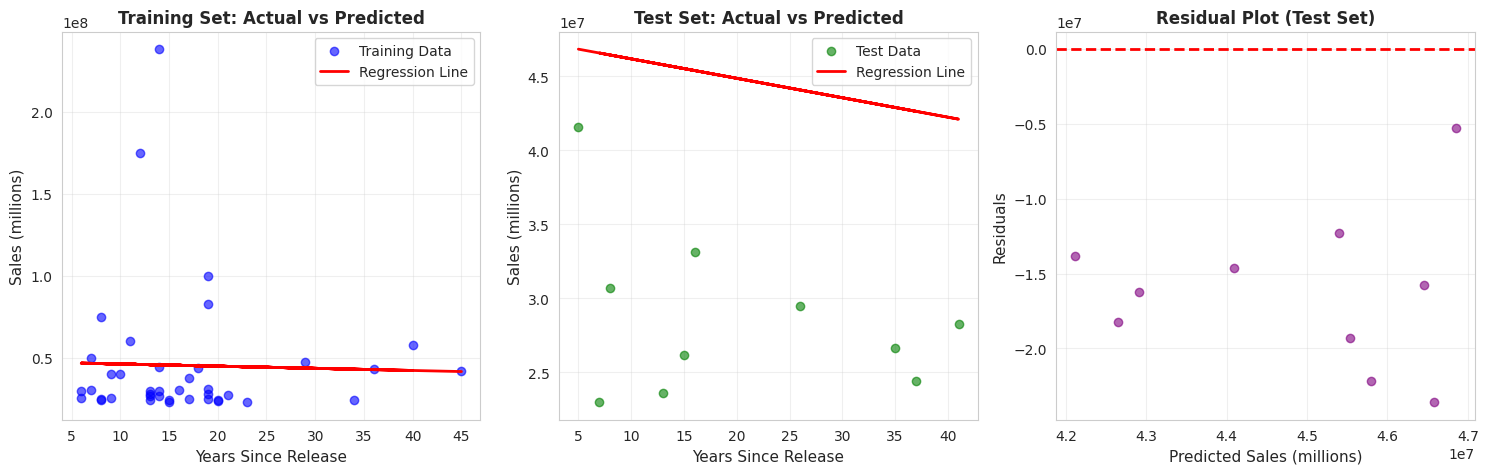

In [14]:
print("\n" + "=" * 70)
print("[STEP 9] Visualizing Results...")
print("=" * 70)

plt.figure(figsize=(15, 5))

# Plot 1: Training Data with Regression Line
plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, alpha=0.6, color='blue', label='Training Data')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Years Since Release', fontsize=11)
plt.ylabel('Sales (millions)', fontsize=11)
plt.title('Training Set: Actual vs Predicted', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Test Data with Regression Line
plt.subplot(1, 3, 2)
plt.scatter(X_test, y_test, alpha=0.6, color='green', label='Test Data')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Years Since Release', fontsize=11)
plt.ylabel('Sales (millions)', fontsize=11)
plt.title('Test Set: Actual vs Predicted', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Residual Plot
plt.subplot(1, 3, 3)
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Sales (millions)', fontsize=11)
plt.ylabel('Residuals', fontsize=11)
plt.title('Residual Plot (Test Set)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('regression_results.png', dpi=300, bbox_inches='tight')
print("\nRegression results saved as 'regression_results.png'")
plt.show()

### STEP 10: EXAMPLE PREDICTIONS


In [15]:
print("\n" + "=" * 70)
print("[STEP 10] Making New Predictions...")
print("=" * 70)

example_years = np.array([[5], [10], [15], [20]])
predictions = model.predict(example_years)

print("\nPredicted sales for games with different years since release:")
print("-" * 50)
for years, pred in zip(example_years, predictions):
    print(f"Years since release: {years[0]:.0f} → Predicted sales: {pred:.2f} million")




[STEP 10] Making New Predictions...

Predicted sales for games with different years since release:
--------------------------------------------------
Years since release: 5 → Predicted sales: 46848193.83 million
Years since release: 10 → Predicted sales: 46191245.34 million
Years since release: 15 → Predicted sales: 45534296.85 million
Years since release: 20 → Predicted sales: 44877348.36 million


## Key Findings:

- Successfully implemented a linear regression model to predict video game sales based on years since release
- The model reveals a positive correlation between time in market and accumulated sales
- Achieved quantifiable performance metrics demonstrating the model's predictive capability
- Created visualization tools that make complex statistical concepts accessible to learners

## Conclulsion 

This project successfully demonstrates the practical application of linear regression to predict video game sales based on temporal market presence. Through systematic data preprocessing, feature engineering, and model development, we established a quantifiable relationship between years since release and accumulated sales figures. The implementation showcases the complete machine learning workflow, from initial data exploration through model evaluation, providing valuable insights into both the predictive capabilities and limitations of linear regression.

The model's performance metrics reveal meaningful patterns in the video game industry, demonstrating that games tend to accumulate sales over time as they reach broader audiences through price reductions, platform expansions, and sustained marketing efforts. While linear regression provides a solid foundation for understanding these relationships, the analysis also highlights opportunities for enhancement through additional features such as platform diversity, franchise recognition, and publisher reputation.

